<a href="https://colab.research.google.com/github/karla-sm/M-dulo-II-Diplomado-TEyMD/blob/main/Trabajo_5_Equipo_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center> **Facultad de Estudios Superiores Acatlán.** </center></h1>
# <h3><center> **Metodos Estadisticos y Mineria de Datos** </center></h3>
# <h4><center> **Modulo II** </center></h4>

---

# <center> *Estimador de Maxima Verosimilitud (ejercicio)* </center>

---

**Integrantes del Equipo 5:**

  *   *Omar Misael Valero Silva*
  *   *Karla Anahí Sánchez Morales*
  *   *Karol Jacqueline Nolasco Reyes*
  *   *David Mendieta Lopez*
  *   *César Gabriel López López*

Existen distintos métodos para estimar parámetros desconocidos a partir de un conjunto de datos. **El Estimador Máximo Verosímil** *(MLE)* responde a la siguiente pregunta:

$$ \text{¿Para que valor del parametro, los datos observados tienen la probabilidad más alta?} $$

Como su nombre lo dice, se trata de encontrar el valor maximo que nos arrojo **la funcion verosimil**, dicha funcion consiste modelar un parametro $\theta$ perteneciente a alguna distribucion de probabilidad con el objetivo de **"Maximizar las probabilidades de la distribuciones que manejen dicho parametro"**

**Función de verosímilitud:**

Sea $X_1,X_2,\dots,X_n$ una muestra aleatoria con $f(x;\theta)$. La función de verosimilitud (likelihood) es:

$$ f(x_1,\dots,x_n;\theta) = f(x_1;\theta)\cdots f(x_n;\theta) $$

Entonces:

$$ L(\theta; x_1,\dots,x_n) = \prod_{i=1}^n f(x_i,\theta) $$

Por ejemplo, Si $X_1,\dots,X_n$ es una m.a. Poisson($\lambda$), entonces:

$$ L(x_1,\dots,x_n;\lambda) = \frac{e^{-n\lambda} \lambda^{\sum x_i }}{\prod x_i !} $$

**Estimador Máximo Verosímil:**

Es el valor de $\theta$, donde $L(\theta;x_1,\dots,x_n)$ alcanza el máximo, y por ello solo es cuestion de resolver la siguiente ecuacion de $p$...`

$$ \frac{d}{d\theta} \left( L(\theta;x_1,\dots,x_n) \right) = 0 $$

Solo es cuestion de despejar $\theta$. Veremos algunos ejemplos y ejercicios practicos de como utilizar este metodo...

**Ejemplo:**

Una moneda se lanza 100 veces. Dado que se obtienen 55 soles; nos gustaria saber cual es la probabilidad de que salga sol en un lanzamiento *(la probabilidad de exito)*.

Pero el unico detalle que no sabemos es el hecho del parametro; es decir, no conocemos cual es la probabilidad de exito de $p$ para la distribucion la cual la definimos como:

$$ \text{X: el numero de soles que se obtienen al lanzar una moneda} $$

La cual es claro que se distribuye como: $X \sim Bin(100,p)$

Podemos pensar en contar el número de soles en los 100 lanzamientos, entonces la probabilidad de obtener 55 soles en este experimento, es la siguiente:

$$ \mathbb{P}(55 ~ soles; p) = \binom{100}{55}p^{55}(1-p)^{100-55} $$

Aun asi esto no nos da mas informacion de como obtener a $p$, pero usando el **MLE** podemos resolver la situacion de esta forma...

$$ \frac{d}{dp}(\mathbb{P}(55 ~ soles ;p)) = \frac{d}{dp} \left( \binom{100}{55}p^{55}(1-p)^{45} \right) = \binom{100}{55} \left( 55p^{54} \cdot (1 - p)^{45} - p^{55} \cdot 45(1 - p)^{44} \right) $$

Igualamos a cero y tenemos que...

$$ \binom{100}{55} \left( 55p^{54} \cdot (1 - p)^{45} - p^{55} \cdot 45(1 - p)^{44} \right) = 0 $$

$$ ~ \Rightarrow ~ 55p^{54} \cdot (1 - p)^{45} - p^{55} \cdot 45(1 - p)^{44} = 0 $$

$$ ~ \Rightarrow ~ 55p^{54} \cdot (1 - p)^{45} = p^{55} \cdot 45(1 - p)^{44} $$

Entonces, resolviendo para $p$, se tiene...

$$ 55(1-p) = 45p ~ ~ \Rightarrow ~ ~ 55 - 55p = 45p ~ ~ \Rightarrow ~ ~ 55 = 100p $$

Por lo tanto tenemos que:

$$ \hat{p} = \frac{55}{100}$$

De hecho podemos podemos evitarnos mucho trabajo de resolver esta ecuaciones si ocupamos las funciones que nos ofrece la paqueteria "*Scipy*", ya que tiene modelado lo que es "el despeje de cualquier varible que se pida de una ecuacion"...

In [ ]:
from scipy.stats import bernoulli, binom      # Traemos a las distrbuciones bernoulli y binomial
import numpy as np
import sympy                    # Para calculo simbolico y algebraico -> encontra el estimador de maneta analítica
from sympy.abc import x

# Definir a p como una variable simbolica positiva
p = sympy.symbols('p', positive = True )

# Recreamos la probabilidad que habimos establecido (sin la necesidad de la combinatoria ya que seria un constante que podemos quitarla)
f = p**55 * (1-p)**(100-55)

# Pidimos que resuelva la ecuacion que nos pide por medio la funcion: "solve" y indicando a que esta igualada
phat = sympy.solve(sympy.diff(f,p),p)[0]

print("Es estimador de máxima verosimilitud es", phat)      # Mandamos a imprimir el resultado

Es estimador de máxima verosimilitud es 11/20


Veamos otro ejemplo de como funciona el "solve", "log", "expand_log":

In [ ]:
r = binom.rvs(1,0.7, size=100)
r

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [ ]:
f = p**x*(1-p)**(1-x)
J = np.prod([f.subs(x,i) for i in r])
logJ = sympy.expand_log(sympy.log(J)) #logaritmo
phat = sympy.solve(sympy.diff(logJ,p),p)[0]
print("Es estimador de máxima verosimilitud es", phat)

Es estimador de máxima verosimilitud es 33/50


### $\color{red}{\text{Ejercicio 1:}}$

Observa la siguiente imagen y resuleve lo que se te pide *(reescribe el problema para mayor comodidad)*...

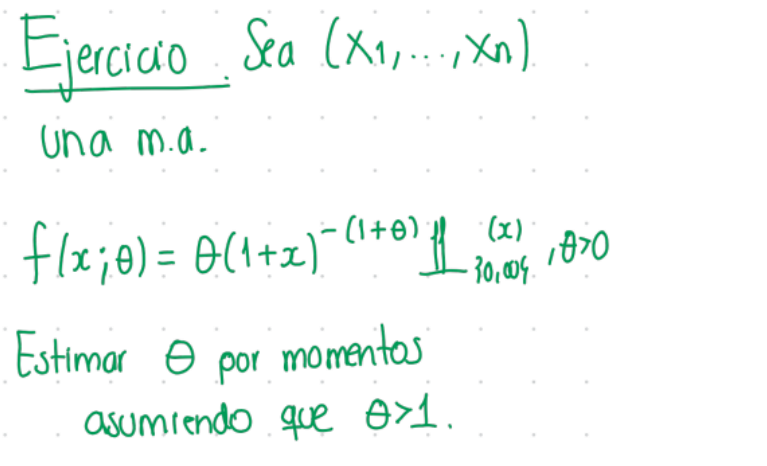

**Solucion:**

Sea $(x_1 \dots x_n)$ una m.a con distribución
$$f(x;\theta)=\theta(1+x)^{-(1+\theta)}\mathbb{I}_{(0,\infty)}(x), \quad \theta >1 $$
Estimar $\theta$ por el metodo de momentos.

**Solucion**
Calculemos la esperanza de $X$ con densidad $f(x;\theta)=\theta(1+x)^{-(1+\theta)}\mathbb{I}_{(0,\infty)}(x), \quad \theta >1 $

$$ E[X]=\int_0^\infty x\theta(1+x)^{-(1+\theta)}dx=\theta\int_0^\infty x(1+x)^{-(1+\theta)}dx $$

sea $u = 1+x$, por lo que tenemos

$$\begin{align}
\theta\int_0^\infty x(1+x)^{-(1+\theta)}dx &=\theta\int_1^\infty (u-1)u^{-(1+\theta)} dx \\ &= \theta\int_1^\infty u^{-\theta}-u^{-(1+\theta)}dx \\ &= \theta\int_1^\infty u^{-\theta}- \theta\int_1^\infty u^{-(1+\theta)}dx \\ &= \theta \frac{u^{1-\theta}}{1-\theta}\Bigg|_{1}^{\infty} + u^{-\theta}\Bigg{|}_1^\infty \\ &= \frac{\theta}{\theta-1}-1  \\ &=\frac{1}{\theta-1}
\end{align}$$

Ahora, igualando $E[X]$ al primer momento muestral

$$E[X]=\frac{1}{\theta-1}=\sum_{i=1}^\infty \frac{x_i}{n}=\bar{x}$$

Por lo que el estimador para $\theta$ es
$$\hat{\theta}=\frac{1+\bar{x}}{\bar{x}}$$

### $\color{red}{\text{Ejercicio 2:}}$

El tiempo de retardo para pacientes con enfermedad coronaria potencial se define como la duración entre el comienzo de un síntoma agudo cardiovascular y la llegada a la unidad de emergencia.

Se supone que el tiempo de retardo sigue una distribución exponencial con parámetro $\theta $.

Se registraron los tiempos de retardo (en minutos) en la clínica para los primeros 20 pacientes:

$$ 525, \ 719, \ 2880, \ 150, \ 30, \ 251, \ 45, \ 858, \ 15, \ 47, \ 90, \ 56, \ 68, \ 6, \ 189, \ 180, \ 60, \ 60, \ 294, \ 747 $$

- Encuentra un estimador por el método de momentos para la media de la distribución.
- Encuentra el valor del estimador con los datos dados.

**Estimación por el Método de Momentos en Distribución Exponencial**

Sea $(X_1, X_2, \dots, X_n)$ una muestra aleatoria con distribución exponencial de parámetro $\theta$:

$$ f(x; \theta) = \frac{1}{\theta} e^{-x/\theta}, \quad x > 0, \ \theta > 0 $$

**1. Encuentra un estimador por el método de momentos para la media de la distribución.**

Sabemos que la esperanza de una variable aleatoria con distribución exponencial es:

$$ E[X] = \theta $$

Por el método de momentos, igualamos la media teórica con la media muestral:

$$ \hat{\theta}_{MM} = \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i $$

**2. Encuentra el valor del estimador con los datos dados.**

Los tiempos de retardo registrados en la clínica son:

$$ 525, \ 719, \ 2880, \ 150, \ 30, \ 251, \ 45, \ 858, \ 15, \ 47, \ 90, \ 56, \ 68, \ 6, \ 189, \ 180, \ 60, \ 60, \ 294, \ 747 $$

Calculamos la media muestral:

$$ \bar{X} = \frac{1}{20} \sum_{i=1}^{20} X_i $$

Calculando la suma:

$$ \sum_{i=1}^{20} X_i = 7270 $$

Finalmente, obtenemos el estimador:

$$ \hat{\theta}_{MM} = \frac{7270}{20} = 363.5 $$

**Conclusión:**  
El estimador de $\theta$ por el método de momentos es:

$$ \hat{\theta}_{MM} = 363.5 \text{ minutos} $$






### $\color{red}{\text{Ejercicio 3:}}$

Sea una muestra aleatoria $X_1, \ldots, X_n \overset{iid}{\sim} \mathcal{N}(\mu, \sigma^2) $.
Queremos encontrar el estimador de máxima verosimilitud para $\mu$ y $\sigma^2$.

La función de densidad es:
$$ f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right) \cdot \mathbf{1}_{(-\infty, \infty)}(x) $$

**Solucion:**

Creamos la funcion verosimil de nuestra m.a. que tenemos...

$$ L(\theta; x_1,\dots,x_n) = \prod_{i=1}^n f(x_i,\theta) = \prod_{i=1}^n \left( \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) \right) $$

$$ \prod_{i=1}^n \left( \frac{1}{\sqrt{2\pi \sigma^2}} \right) \cdot \prod_{i=1}^n \exp \left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) = \left( \frac{1}{\sqrt{2\pi \sigma^2}} \right)^n \cdot \exp \left( - \sum_{i=1}^n \frac{(x_i - \mu)^2}{2\sigma^2} \right) $$

El detalle de aqui es el hecho de que la derivada que usamos provocara que se complique mucho el algebra; por ello vamos un hecho importante...

Dado a que la distribucion Normal pertenece a **la familia de la exponenciales**, por prosicion tenemos la **EMV** lo podemos resolver de la siguiente forma:

$$ \frac{d}{d\theta} \left( \ln \left( L(\theta;x_1,\dots,x_n) \right) \right) = 0 $$

Por otra parte, dado a que tenemos 2 parametros de la distribucion Normal, el metodo de maxima verosimilitud se requiere de resolver 2 ecuaciones *(uno por cada parametro)*. con ello vamos desarrollarlo cada ecuacion...

* La primer derivada con respecto a $\mu$

$$ \frac{d}{d\mu} \left( \ln \left( L(\mu;x_1,\dots,x_n) \right) \right) = 0 ~ \Rightarrow ~ \frac{d}{d \mu} \left( \ln \left( \left( \frac{1}{\sqrt{2\pi \sigma^2}} \right)^n \cdot \exp \left( - \sum_{i=1}^n \frac{(x_i - \mu)^2}{2\sigma^2} \right) \right) \right) = 0 $$

$$ ~  \Rightarrow ~ \frac{d}{d \mu} \left( \ln \left( \left( \frac{1}{\sqrt{2\pi \sigma^2}} \right)^n \right) + \ln \left( \exp \left( - \sum_{i=1}^n \frac{(x_i - \mu)^2}{2\sigma^2} \right) \right) \right) = 0 $$

$$ ~  \Rightarrow ~ - \sum_{i=1}^n \frac{d}{d \mu} \left( \frac{(x_i - \mu)^2}{2\sigma^2} \right) = 0  ~ \Rightarrow ~ \frac{1}{2\sigma^2} \cdot \sum_{i=1}^n 2(x_i - \mu) = 0 ~ \Rightarrow ~ \frac{1}{\sigma^2} \cdot \sum_{i=1}^n (x_i - \mu) = 0 $$

$$ ~ \Rightarrow ~ \sum_{i=1}^n (x_i - \mu) = 0 ~ \Rightarrow ~ \sum_{i=1}^n x_i - n \mu = 0 ~ \Rightarrow ~ \sum_{i=1}^n x_i = n \mu  $$

Por lo tanto tenemos que el estimador de $\mu$ sera la siguiente:

$$ \hat{\mu} = \frac{\sum_{i=1}^n}{n} = \bar{X} $$


* La segunda derivada con respecto a $\sigma^2$

$$ \frac{d}{d \sigma^2} \left( \ln \left( L(\sigma^2;x_1,\dots,x_n) \right) \right) = 0 ~ \Rightarrow ~ \frac{d}{d \sigma^2} \left( \ln \left( \left( \frac{1}{\sqrt{2\pi \sigma^2}} \right)^n \cdot \exp \left( - \sum_{i=1}^n \frac{(x_i - \mu)^2}{2\sigma^2} \right) \right) \right) = 0 $$

$$ ~ \Rightarrow ~ \frac{d}{d \sigma^2} \left( \ln \left( \left( \frac{1}{\sqrt{2\pi \sigma^2}} \right)^n \right) + \ln \left( \exp \left( - \sum_{i=1}^n \frac{(x_i - \mu)^2}{2\sigma^2} \right) \right) \right) = 0 $$

$$ ~ \Rightarrow ~ \frac{d}{d \sigma^2} \left( n \cdot \ln \left( \frac{1}{\sqrt{2\pi \sigma^2}} \right) - \frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2 \right) = 0 $$

$$ ~ \Rightarrow ~ \frac{d}{d \sigma^2} \left( n \cdot \ln \left( \frac{1}{\sqrt{2\pi \sigma^2}} \right) \right) - \frac{d}{d \sigma^2} \left( \frac{1}{\sigma^2} \sum_{i=1}^n \frac{(x_i - \mu)^2}{2} \right) = 0 $$

Veamos cada uno de los terminos que vamos a derivar...

$$ \frac{d}{d \sigma^2} \left( n \cdot \ln \left( \frac{1}{\sqrt{2\pi \sigma^2}} \right) \right) = \frac{d}{d \sigma^2} \left( n \cdot \ln (1) - n \cdot \ln \left( \sqrt{2\pi \sigma^2} \right)  \right) = \frac{d}{d \sigma^2} \left( - n \cdot \ln \left( \sqrt{2\pi \sigma^2} \right) \right) $$

$$ = - \frac{d}{d \sigma^2} \left( \frac{n}{2} \cdot \ln \left( 2 \pi \sigma^2 \right) \right) = - \frac{d}{d \sigma^2} \left( \frac{n}{2} \cdot \ln (2 \pi) + \frac{n}{2} \cdot \ln (\sigma^2) \right) $$

En resumen tenemos que la forma mas simple de este termino es:

$$ - \frac{n}{2} \cdot \frac{1}{\sigma^2} $$

Para el segundo termino...

$$ - \sum_{i=1}^n (x_i - \mu)^2 \cdot \frac{d}{d \sigma^2} \left( \frac{1}{2 \sigma^2} \right) = \frac{1}{2 (\sigma^2)^2} \cdot \sum_{i=1}^n (x_i - \mu)^2 $$

Simplificando el la ecuacion principal tenemos que:

$$ - \frac{n}{2} \cdot \frac{1}{\sigma^2} + \frac{1}{2 (\sigma^2)^2} \cdot \sum_{i=1}^n (x_i - \mu)^2 = 0 ~ \Rightarrow ~ \frac{n}{2} \cdot \frac{1}{\sigma^2} = \frac{1}{2 (\sigma^2)^2} \cdot \sum_{i=1}^n (x_i - \mu)^2 $$

$$ ~ \Rightarrow ~ n \cdot \frac{1}{2} \cdot \frac{1}{\sigma^2} = \frac{1}{2} \cdot \frac{1}{ \sigma^2} \cdot \frac{1}{ \sigma^2} \cdot \sum_{i=1}^n (x_i - \mu)^2 ~ \Rightarrow ~ n = \frac{1}{ \sigma^2} \cdot \sum_{i=1}^n (x_i - \mu)^2 $$

Remplazamos la $\hat{\mu}$ anterior y con ello podemos decir que el estimador para $\sigma^2$ sera el siguiente:

$$ \sigma^2 = \frac{1}{n} \cdot \sum_{i=1}^n (x_i - \bar{X})^2 = \sum_{i=1}^n \frac{(x_i - \bar{X})^2}{n} $$

En genral tenemos que los estimadores para la distribucion Normal sera los siguientes...

$$ \hat{\mu} = \frac{\sum_{i=1}^n}{n} = \bar{X} $$

$$ Y $$

$$ \sigma^2 = \frac{1}{n} \cdot \sum_{i=1}^n (x_i - \bar{X})^2 = \sum_{i=1}^n \frac{(x_i - \bar{X})^2}{n} $$

### $\color{red}{\text{Ejercicio 4:}}$

Suponga que la vida util de los focos de cierta marca, se modela mediante una distribución expoencial de parametro $\theta$ (desconocido). Probamos 5 focos y encontramos que tienen una vida útil de $2,3,1,3$ y $5$ años, respectivamente. ¿Cuál es el MLE para $\theta$?

**Solución:**

In [ ]:
import sympy
import numpy as np

# Datos de la muestra
muestra = np.array([2, 3, 1, 3, 5])

# Definir variables simbólicas
theta = sympy.Symbol('theta')
x = sympy.Symbol('x')

# Función de densidad de probabilidad para la distribución exponencial
f = theta * sympy.exp(-theta * x)

# Función de verosimilitud
J = sympy.prod([f.subs(x, i) for i in muestra])

# Logaritmo de la función de verosimilitud
logJ = sympy.expand_log(sympy.log(J))

# Derivada del logaritmo de la verosimilitud con respecto a theta
diff_logJ = sympy.diff(logJ, theta)

# Resolver para theta
theta_hat = sympy.solve(diff_logJ, theta)[0]

print(f"El Estimador de Máxima Verosimilitud para theta es: {theta_hat}")

El Estimador de Máxima Verosimilitud para theta es: 5/14
